In [ ]:
import pandas as pd

# Load the data
mars_weather = pd.read_csv("/content/REMS_Mars_Dataset.csv")

# Look at the data
print(mars_weather.head())

         earth_date_time           mars_date_time sol_number  \
0  Earth, 2022-01-26 UTC  Mars, Month 6 - LS 163°   Sol 3368   
1  Earth, 2022-01-25 UTC  Mars, Month 6 - LS 163°   Sol 3367   
2  Earth, 2022-01-24 UTC  Mars, Month 6 - LS 162°   Sol 3366   
3  Earth, 2022-01-23 UTC  Mars, Month 6 - LS 162°   Sol 3365   
4  Earth, 2022-01-22 UTC  Mars, Month 6 - LS 161°   Sol 3364   

  max_ground_temp(°C) min_ground_temp(°C) max_air_temp(°C) min_air_temp(°C)  \
0                  -3                 -71               10              -84   
1                  -3                 -72               10              -87   
2                  -4                 -70                8              -81   
3                  -6                 -70                9              -91   
4                  -7                 -71                8              -92   

  mean_pressure(Pa)      wind_speed(m/h)          humidity(%) sunrise sunset  \
0               707  Value not available  Value not availabl

In [ ]:
mars_weather = mars_weather.rename(columns={
    'earth_date_time': 'earth_date',
    'sol_number': 'sol',
    'max_ground_temp(°C)': 'max_ground_temp',
    'min_ground_temp(°C)': 'min_ground_temp',
    'max_air_temp(°C)': 'max_air_temp',
    'min_air_temp(°C)': 'min_air_temp',
    'mean_pressure(Pa)': 'mean_pressure',
    'wind_speed(m/h)': 'wind_speed',
    'humidity(%)': 'humidity',
    'UV_Radiation': 'uv_radiation'
})

mars_weather.head()

,earth_date,mars_date_time,sol,max_ground_temp,min_ground_temp,max_air_temp,min_air_temp,mean_pressure,sunrise,sunset,day_duration,mean_ground_temp,mean_air_temp,solar_long,season,mars_year
0,2022-01-26,"Mars, Month 6 - LS 163",3368,-3,-71,10,-84,707,05:25,17:20,715.0,NaN,NaN,163,Summer,Year 36
1,2022-01-25,"Mars, Month 6 - LS 163",3367,-3,-72,10,-87,707,05:25,17:20,715.0,NaN,NaN,163,Summer,Year 36
2,2022-01-24,"Mars, Month 6 - LS 162",3366,-4,-70,8,-81,708,05:25,17:21,716.0,NaN,NaN,162,Summer,Year 36
3,2022-01-23,"Mars, Month 6 - LS 162",3365,-6,-70,9,-91,707,05:26,17:21,715.0,NaN,NaN,162,Summer,Year 36
4,2022-01-22,"Mars, Month 6 - LS 161",3364,-7,-71,8,-92,708,05:26,17:21,715.0,NaN,NaN,161,Summer,Year 36


In [ ]:
columns_to_drop = ['wind_speed', 'humidity', 'uv_radiation', 'weather']
mars_weather = mars_weather.drop(columns=columns_to_drop)

mars_weather

,earth_date,mars_date_time,sol,max_ground_temp,min_ground_temp,max_air_temp,min_air_temp,mean_pressure,sunrise,sunset
0,"Earth, 2022-01-26 UTC","Mars, Month 6 - LS 163°",Sol 3368,-3,-71,10,-84,707,05:25,17:20
1,"Earth, 2022-01-25 UTC","Mars, Month 6 - LS 163°",Sol 3367,-3,-72,10,-87,707,05:25,17:20
2,"Earth, 2022-01-24 UTC","Mars, Month 6 - LS 162°",Sol 3366,-4,-70,8,-81,708,05:25,17:21
3,"Earth, 2022-01-23 UTC","Mars, Month 6 - LS 162°",Sol 3365,-6,-70,9,-91,707,05:26,17:21
4,"Earth, 2022-01-22 UTC","Mars, Month 6 - LS 161°",Sol 3364,-7,-71,8,-92,708,05:26,17:21
...,...,...,...,...,...,...,...,...,...,...
3192,"Earth, 2012-08-18 UTC","Mars, Month 6 - LS 156°",Sol 12,-18,-76,8,-82,741,05:28,17:21
3193,"Earth, 2012-08-17 UTC","Mars, Month 6 - LS 156°",Sol 11,-11,-76,9,-83,740,05:28,17:21
3194,"Earth, 2012-08-16 UTC","Mars, Month 6 - LS 155°",Sol 10,-16,-75,8,-83,739,05:28,17:22
3195,"Earth, 2012-08-15 UTC","Mars, Month 6 - LS 155°",Sol 9,Value not available,Value not available,Value not available,Value not available,Value not available,05:28,17:22


In [ ]:
# Perform column transformations
mars_weather['earth_date'] = mars_weather['earth_date'].str.replace("Earth, | UTC", "")
mars_weather['sol'] = mars_weather['sol'].str.replace("Sol ", "")
mars_weather['mars_date_time'] = mars_weather['mars_date_time'].str.replace("°", "")

# Look at the updated DataFrame
print(mars_weather.head())

   earth_date          mars_date_time   sol max_ground_temp min_ground_temp  \
0  2022-01-26  Mars, Month 6 - LS 163  3368              -3             -71   
1  2022-01-25  Mars, Month 6 - LS 163  3367              -3             -72   
2  2022-01-24  Mars, Month 6 - LS 162  3366              -4             -70   
3  2022-01-23  Mars, Month 6 - LS 162  3365              -6             -70   
4  2022-01-22  Mars, Month 6 - LS 161  3364              -7             -71   

  max_air_temp min_air_temp mean_pressure sunrise sunset  
0           10          -84           707   05:25  17:20  
1           10          -87           707   05:25  17:20  
2            8          -81           708   05:25  17:21  
3            9          -91           707   05:26  17:21  
4            8          -92           708   05:26  17:21  


<ipython-input-5-71393fe79063>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  mars_weather['earth_date'] = mars_weather['earth_date'].str.replace("Earth, | UTC", "")


In [ ]:

# Look at the updated DataFrame
print(mars_weather.head())

   earth_date          mars_date_time   sol max_ground_temp min_ground_temp  \
0  2022-01-26  Mars, Month 6 - LS 163  3368              -3             -71   
1  2022-01-25  Mars, Month 6 - LS 163  3367              -3             -72   
2  2022-01-24  Mars, Month 6 - LS 162  3366              -4             -70   
3  2022-01-23  Mars, Month 6 - LS 162  3365              -6             -70   
4  2022-01-22  Mars, Month 6 - LS 161  3364              -7             -71   

  max_air_temp min_air_temp mean_pressure sunrise sunset  
0           10          -84           707   05:25  17:20  
1           10          -87           707   05:25  17:20  
2            8          -81           708   05:25  17:21  
3            9          -91           707   05:26  17:21  
4            8          -92           708   05:26  17:21  


In [ ]:
# Create new column for day duration
mars_weather['day_duration'] = pd.to_datetime(mars_weather['sunset']) - pd.to_datetime(mars_weather['sunrise'])
mars_weather['day_duration'] = mars_weather['day_duration'].dt.total_seconds() / 60

# Look at the updated DataFrame
print(mars_weather.head())

   earth_date          mars_date_time   sol max_ground_temp min_ground_temp  \
0  2022-01-26  Mars, Month 6 - LS 163  3368              -3             -71   
1  2022-01-25  Mars, Month 6 - LS 163  3367              -3             -72   
2  2022-01-24  Mars, Month 6 - LS 162  3366              -4             -70   
3  2022-01-23  Mars, Month 6 - LS 162  3365              -6             -70   
4  2022-01-22  Mars, Month 6 - LS 161  3364              -7             -71   

  max_air_temp min_air_temp mean_pressure sunrise sunset  day_duration  
0           10          -84           707   05:25  17:20         715.0  
1           10          -87           707   05:25  17:20         715.0  
2            8          -81           708   05:25  17:21         716.0  
3            9          -91           707   05:26  17:21         715.0  
4            8          -92           708   05:26  17:21         715.0  


In [ ]:
# Calculate average ground temperature
mars_weather['mean_ground_temp'] = mars_weather[['max_ground_temp', 'min_ground_temp']].mean(axis=1, skipna=True)

# Calculate average air temperature
mars_weather['mean_air_temp'] = mars_weather[['max_air_temp', 'min_air_temp']].mean(axis=1, skipna=True)

# Look at the updated DataFrame
print(mars_weather.head())

   earth_date          mars_date_time   sol max_ground_temp min_ground_temp  \
0  2022-01-26  Mars, Month 6 - LS 163  3368              -3             -71   
1  2022-01-25  Mars, Month 6 - LS 163  3367              -3             -72   
2  2022-01-24  Mars, Month 6 - LS 162  3366              -4             -70   
3  2022-01-23  Mars, Month 6 - LS 162  3365              -6             -70   
4  2022-01-22  Mars, Month 6 - LS 161  3364              -7             -71   

  max_air_temp min_air_temp mean_pressure sunrise sunset  day_duration  \
0           10          -84           707   05:25  17:20         715.0   
1           10          -87           707   05:25  17:20         715.0   
2            8          -81           708   05:25  17:21         716.0   
3            9          -91           707   05:26  17:21         715.0   
4            8          -92           708   05:26  17:21         715.0   

   mean_ground_temp  mean_air_temp  
0               NaN            NaN  
1     

<ipython-input-8-cc7f7bb5dd26>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mars_weather['mean_ground_temp'] = mars_weather[['max_ground_temp', 'min_ground_temp']].mean(axis=1, skipna=True)
<ipython-input-8-cc7f7bb5dd26>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mars_weather['mean_air_temp'] = mars_weather[['max_air_temp', 'min_air_temp']].mean(axis=1, skipna=True)


In [ ]:
# Extract solar longitude from mars_date_time
mars_weather['solar_long'] = mars_weather['mars_date_time'].str[-3:]
mars_weather['solar_long'] = mars_weather['solar_long'].str.replace("S | ", "")
mars_weather['solar_long'] = pd.to_numeric(mars_weather['solar_long'])

# Look at the updated DataFrame
print(mars_weather.head())


   earth_date          mars_date_time   sol max_ground_temp min_ground_temp  \
0  2022-01-26  Mars, Month 6 - LS 163  3368              -3             -71   
1  2022-01-25  Mars, Month 6 - LS 163  3367              -3             -72   
2  2022-01-24  Mars, Month 6 - LS 162  3366              -4             -70   
3  2022-01-23  Mars, Month 6 - LS 162  3365              -6             -70   
4  2022-01-22  Mars, Month 6 - LS 161  3364              -7             -71   

  max_air_temp min_air_temp mean_pressure sunrise sunset  day_duration  \
0           10          -84           707   05:25  17:20         715.0   
1           10          -87           707   05:25  17:20         715.0   
2            8          -81           708   05:25  17:21         716.0   
3            9          -91           707   05:26  17:21         715.0   
4            8          -92           708   05:26  17:21         715.0   

   mean_ground_temp  mean_air_temp  solar_long  
0               NaN            

<ipython-input-9-7bcdc9d30d4a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  mars_weather['solar_long'] = mars_weather['solar_long'].str.replace("S | ", "")


In [ ]:
# Define a function to determine the season based on solar longitude
def get_season(solar_long):
    if 0 <= solar_long <= 89:
        return 'Spring'
    elif 90 <= solar_long <= 179:
        return 'Summer'
    elif 180 <= solar_long <= 269:
        return 'Autumn'
    elif 270 <= solar_long <= 360:
        return 'Winter'
    else:
        return 'Unknown'

# Create a new 'season' column using the function
mars_weather['season'] = mars_weather['solar_long'].apply(get_season)

# Look at the updated DataFrame
print(mars_weather.head())

   earth_date          mars_date_time   sol max_ground_temp min_ground_temp  \
0  2022-01-26  Mars, Month 6 - LS 163  3368              -3             -71   
1  2022-01-25  Mars, Month 6 - LS 163  3367              -3             -72   
2  2022-01-24  Mars, Month 6 - LS 162  3366              -4             -70   
3  2022-01-23  Mars, Month 6 - LS 162  3365              -6             -70   
4  2022-01-22  Mars, Month 6 - LS 161  3364              -7             -71   

  max_air_temp min_air_temp mean_pressure sunrise sunset  day_duration  \
0           10          -84           707   05:25  17:20         715.0   
1           10          -87           707   05:25  17:20         715.0   
2            8          -81           708   05:25  17:21         716.0   
3            9          -91           707   05:26  17:21         715.0   
4            8          -92           708   05:26  17:21         715.0   

   mean_ground_temp  mean_air_temp  solar_long  season  
0               NaN    

In [ ]:
# Convert 'season' column to a categorical data type with specified order of levels
mars_weather['season'] = pd.Categorical(mars_weather['season'], categories=['Spring', 'Summer', 'Autumn', 'Winter'], ordered=True)
# Look at the updated DataFrame
print(mars_weather.head())

   earth_date          mars_date_time   sol max_ground_temp min_ground_temp  \
0  2022-01-26  Mars, Month 6 - LS 163  3368              -3             -71   
1  2022-01-25  Mars, Month 6 - LS 163  3367              -3             -72   
2  2022-01-24  Mars, Month 6 - LS 162  3366              -4             -70   
3  2022-01-23  Mars, Month 6 - LS 162  3365              -6             -70   
4  2022-01-22  Mars, Month 6 - LS 161  3364              -7             -71   

  max_air_temp min_air_temp mean_pressure sunrise sunset  day_duration  \
0           10          -84           707   05:25  17:20         715.0   
1           10          -87           707   05:25  17:20         715.0   
2            8          -81           708   05:25  17:21         716.0   
3            9          -91           707   05:26  17:21         715.0   
4            8          -92           708   05:26  17:21         715.0   

   mean_ground_temp  mean_air_temp  solar_long  season  
0               NaN    

In [ ]:
# Convert 'sol' column to numeric data type
mars_weather['sol'] = pd.to_numeric(mars_weather['sol'], errors='coerce')



In [ ]:
# Define the conditions and choices for years
conditions = [
    (mars_weather['sol'].between(0, 350)),
    (mars_weather['sol'].between(351, 1018)),
    (mars_weather['sol'].between(1019, 1687)),
    (mars_weather['sol'].between(1688, 2356)),
    (mars_weather['sol'].between(2357, 3023)),
    (mars_weather['sol'].between(3024, 3368))
]
choices = ['Year 31', 'Year 32', 'Year 33', 'Year 34', 'Year 35', 'Year 36']



In [ ]:
import numpy as np

# Create a new 'mars_year' column based on the conditions and choices
mars_weather['mars_year'] = np.select(conditions, choices, default='Unknown')

# Look at the updated DataFrame
print(mars_weather.head())

   earth_date          mars_date_time   sol max_ground_temp min_ground_temp  \
0  2022-01-26  Mars, Month 6 - LS 163  3368              -3             -71   
1  2022-01-25  Mars, Month 6 - LS 163  3367              -3             -72   
2  2022-01-24  Mars, Month 6 - LS 162  3366              -4             -70   
3  2022-01-23  Mars, Month 6 - LS 162  3365              -6             -70   
4  2022-01-22  Mars, Month 6 - LS 161  3364              -7             -71   

  max_air_temp min_air_temp mean_pressure sunrise sunset  day_duration  \
0           10          -84           707   05:25  17:20         715.0   
1           10          -87           707   05:25  17:20         715.0   
2            8          -81           708   05:25  17:21         716.0   
3            9          -91           707   05:26  17:21         715.0   
4            8          -92           708   05:26  17:21         715.0   

   mean_ground_temp  mean_air_temp  solar_long  season mars_year  
0            

In [ ]:
# Write the cleaned DataFrame to CSV
mars_weather.to_csv("mars_weather_clean.csv", index= True)

In [ ]:
import pandas as pd

# Read the CSV file
mars_season = pd.read_csv("/content/mars_weather_clean.csv")

# Filter the data based on 'mars_year' column
mars_season = mars_season[(mars_season['mars_year'] != "Year 31") & (mars_season['mars_year'] != "Year 36")]

# Display the first few rows
print(mars_season.head())

     Unnamed: 0  earth_date           mars_date_time   sol max_ground_temp  \
318         318  2021-02-06  Mars, Month 12 - LS 359  3023             -15   
319         319  2021-02-05  Mars, Month 12 - LS 358  3022              -2   
320         320  2021-02-04  Mars, Month 12 - LS 358  3021              -6   
321         321  2021-02-03  Mars, Month 12 - LS 357  3020              -7   
322         322  2021-02-02  Mars, Month 12 - LS 357  3019              -6   

    min_ground_temp max_air_temp min_air_temp mean_pressure sunrise sunset  \
318             -74            7          -79           818   06:41  18:41   
319             -73            6          -78           818   06:41  18:41   
320             -74            7          -89           819   06:42  18:42   
321             -74            7          -76           817   06:42  18:42   
322             -73            8          -78           816   06:42  18:43   

     day_duration  mean_ground_temp  mean_air_temp  solar_long

In [ ]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(13, 6.5))

<Figure size 1300x650 with 0 Axes>

<Figure size 1300x650 with 0 Axes>

In [ ]:
# Convert 'season' column to categorical data type
mars_season['season'] = pd.Categorical(mars_season['season'], categories=['Spring', 'Summer', 'Autumn', 'Winter'])

In [ ]:
# Convert 'season' column to categorical data type
mars_season['season'] = pd.Categorical(mars_season['season'], categories=['Spring', 'Summer', 'Autumn', 'Winter'])

In [ ]:
# Assign numeric codes to 'season' categories
mars_season['season_code'] = mars_season['season'].cat.codes

Text(0, 0.5, 'Daylight (minutes)')

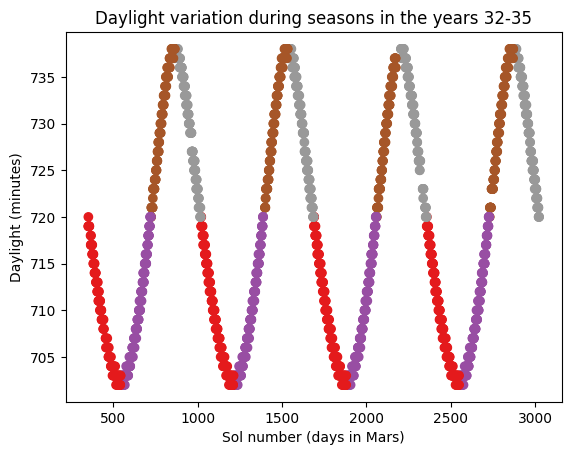

In [ ]:
# Plot the daylight variation
plt.scatter(mars_season['sol'], mars_season['day_duration'], c=mars_season['season_code'], cmap='Set1')
plt.title('Daylight variation during seasons in the years 32-35')
plt.xlabel('Sol number (days in Mars)')
plt.ylabel('Daylight (minutes)')

The shortest days occur in late Spring and the days with the most sunlight occur in late Autumn.

In [ ]:
# Set the plot size
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
mars_season

,Unnamed: 0,earth_date,mars_date_time,sol,max_ground_temp,min_ground_temp,max_air_temp,min_air_temp,mean_pressure,sunrise,sunset,day_duration,mean_ground_temp,mean_air_temp,solar_long,season,mars_year,season_code
318,318,2021-02-06,"Mars, Month 12 - LS 359",3023,-15,-74,7,-79,818,06:41,18:41,720.0,NaN,NaN,359,Winter,Year 35,3
319,319,2021-02-05,"Mars, Month 12 - LS 358",3022,-2,-73,6,-78,818,06:41,18:41,720.0,NaN,NaN,358,Winter,Year 35,3
320,320,2021-02-04,"Mars, Month 12 - LS 358",3021,-6,-74,7,-89,819,06:42,18:42,720.0,NaN,NaN,358,Winter,Year 35,3
321,321,2021-02-03,"Mars, Month 12 - LS 357",3020,-7,-74,7,-76,817,06:42,18:42,720.0,NaN,NaN,357,Winter,Year 35,3
322,322,2021-02-02,"Mars, Month 12 - LS 357",3019,-6,-73,8,-78,816,06:42,18:43,721.0,NaN,NaN,357,Winter,Year 35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2875,2013-08-05,"Mars, Month 1 - LS 2",355,-7,-75,0,-81,857,06:40,18:39,719.0,NaN,NaN,2,Spring,Year 32,0
2876,2876,2013-08-04,"Mars, Month 1 - LS 1",354,-13,-75,-1,-76,857,06:40,18:39,719.0,NaN,NaN,1,Spring,Year 32,0
2877,2877,2013-08-03,"Mars, Month 1 - LS 1",353,-8,-75,-4,-76,855,06:40,18:39,719.0,NaN,NaN,1,Spring,Year 32,0
2878,2878,2013-08-02,"Mars, Month 1 - LS 0",352,-9,-77,-3,-75,854,06:40,18:40,720.0,NaN,NaN,0,Spring,Year 32,0


<ipython-input-27-3bc1c0dabf5e>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = avg_daylight.pivot('mars_year', 'season', 'avg_day')


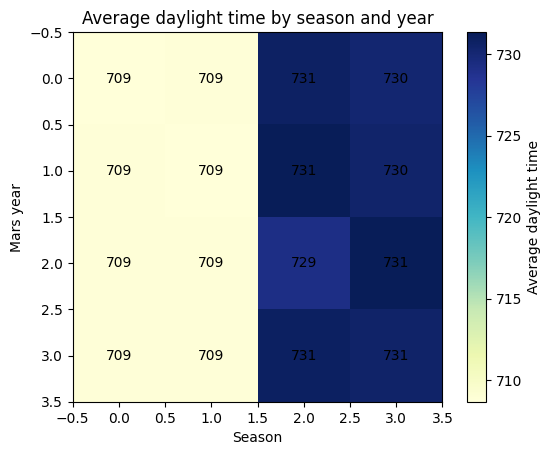

In [ ]:

# Calculate the average daylight duration by season and year
avg_daylight = mars_season.groupby(['mars_year', 'season']).agg(avg_day=('day_duration', 'mean')).reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = avg_daylight.pivot('mars_year', 'season', 'avg_day')

# Create the heatmap
plt.imshow(heatmap_data, cmap='YlGnBu')

# Set x-axis and y-axis labels
plt.xlabel('Season')
plt.ylabel('Mars year')

# Set the colorbar
plt.colorbar(label='Average daylight time')

# Add value annotations to each cell
for i in range(len(heatmap_data)):
    for j in range(len(heatmap_data.columns)):
        plt.text(j, i, f'{heatmap_data.iloc[i, j]:.0f}', ha='center', va='center', color='black')

# Set the title
plt.title('Average daylight time by season and year')

# Show the heatmap
plt.show()


The average length of days remains constant throughout the Mars years. Spring and Summer have shorteer days while Autumn and Winter have longest.

In [ ]:
# Set the plot size
plt.figure(figsize=(6, 6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [ ]:
mars_season

,Unnamed: 0,earth_date,mars_date_time,sol,max_ground_temp,min_ground_temp,max_air_temp,min_air_temp,mean_pressure,sunrise,sunset,day_duration,mean_ground_temp,mean_air_temp,solar_long,season,mars_year,season_code
318,318,2021-02-06,"Mars, Month 12 - LS 359",3023,-15,-74,7,-79,818,06:41,18:41,720.0,NaN,NaN,359,Winter,Year 35,3
319,319,2021-02-05,"Mars, Month 12 - LS 358",3022,-2,-73,6,-78,818,06:41,18:41,720.0,NaN,NaN,358,Winter,Year 35,3
320,320,2021-02-04,"Mars, Month 12 - LS 358",3021,-6,-74,7,-89,819,06:42,18:42,720.0,NaN,NaN,358,Winter,Year 35,3
321,321,2021-02-03,"Mars, Month 12 - LS 357",3020,-7,-74,7,-76,817,06:42,18:42,720.0,NaN,NaN,357,Winter,Year 35,3
322,322,2021-02-02,"Mars, Month 12 - LS 357",3019,-6,-73,8,-78,816,06:42,18:43,721.0,NaN,NaN,357,Winter,Year 35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2875,2013-08-05,"Mars, Month 1 - LS 2",355,-7,-75,0,-81,857,06:40,18:39,719.0,NaN,NaN,2,Spring,Year 32,0
2876,2876,2013-08-04,"Mars, Month 1 - LS 1",354,-13,-75,-1,-76,857,06:40,18:39,719.0,NaN,NaN,1,Spring,Year 32,0
2877,2877,2013-08-03,"Mars, Month 1 - LS 1",353,-8,-75,-4,-76,855,06:40,18:39,719.0,NaN,NaN,1,Spring,Year 32,0
2878,2878,2013-08-02,"Mars, Month 1 - LS 0",352,-9,-77,-3,-75,854,06:40,18:40,720.0,NaN,NaN,0,Spring,Year 32,0


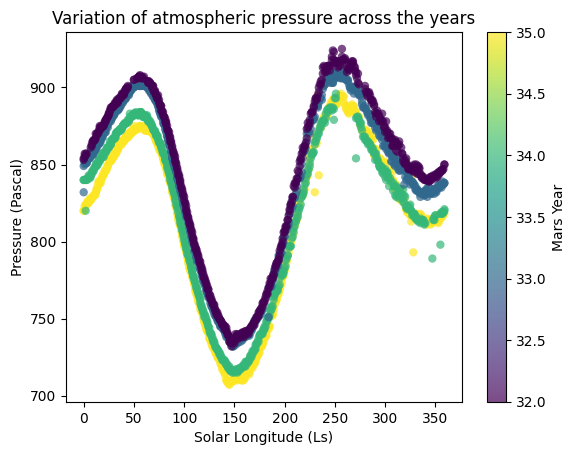

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Convert 'mars_year' values to strings
mars_season['mars_year'] = mars_season['mars_year'].astype(str)

# Extract the numeric part from 'mars_year' column
mars_season['mars_year'] = mars_season['mars_year'].apply(lambda x: int(re.search(r'\d+', x).group()))

# Convert 'mean_pressure' values to float, replacing non-numeric values with NaN
mars_season['mean_pressure'] = pd.to_numeric(mars_season['mean_pressure'], errors='coerce')

# Plot the data
plt.scatter(mars_season['solar_long'], mars_season['mean_pressure'], c=mars_season['mars_year'], alpha=0.7, cmap='viridis', edgecolors='none')

plt.colorbar(label='Mars Year')
plt.title('Variation of atmospheric pressure across the years')
plt.xlabel('Solar Longitude (Ls)')
plt.ylabel('Pressure (Pascal)')
plt.show()



There is a strange phenomenon where the atmospheric pressures are lower every year, maybe there is a calibration problem in the rover's measuring instrument.

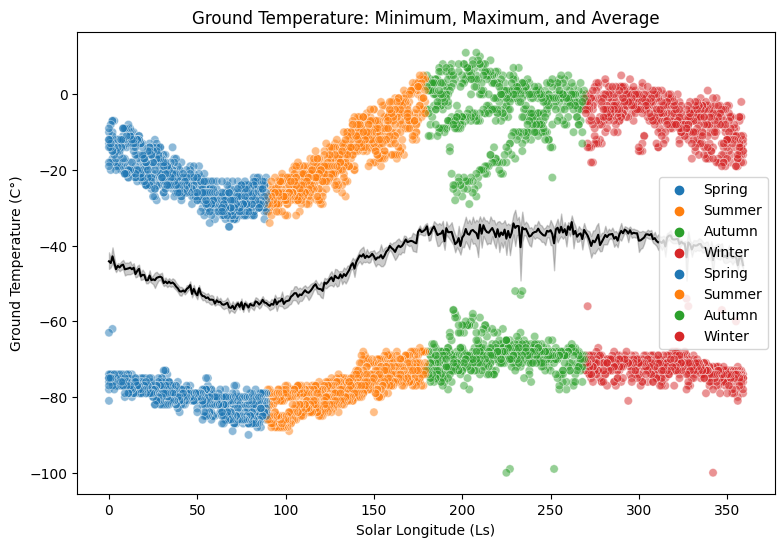

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert temperature columns to numeric type
mars_season['max_ground_temp'] = pd.to_numeric(mars_season['max_ground_temp'], errors='coerce')
mars_season['min_ground_temp'] = pd.to_numeric(mars_season['min_ground_temp'], errors='coerce')

# Calculate the average ground temperature
mars_season['avg_ground_temp'] = (mars_season['max_ground_temp'] + mars_season['min_ground_temp']) / 2

# Drop rows with missing values
mars_season_filtered = mars_season.dropna(subset=['max_ground_temp', 'min_ground_temp', 'avg_ground_temp'])

# Set plot size
plt.figure(figsize=(9, 6))

# Scatter plot of max and min ground temperature
sns.scatterplot(data=mars_season_filtered, x='solar_long', y='max_ground_temp', hue='season', alpha=0.5)
sns.scatterplot(data=mars_season_filtered, x='solar_long', y='min_ground_temp', hue='season', alpha=0.5)

# Plot the average ground temperature
sns.lineplot(data=mars_season_filtered, x='solar_long', y='avg_ground_temp', color='black')

# Set plot title and labels
plt.title('Ground Temperature: Minimum, Maximum, and Average')
plt.xlabel('Solar Longitude (Ls)')
plt.ylabel('Ground Temperature (C°)')

# Show the plot
plt.show()



<ipython-input-32-abfbe59b0ef7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mars_season.corr(), annot=False, cmap='coolwarm')


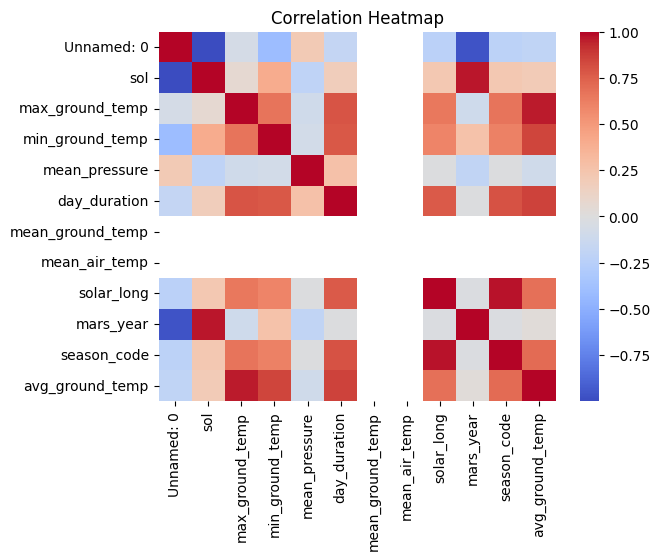

In [ ]:
import seaborn as sns
sns.heatmap(mars_season.corr(), annot=False, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

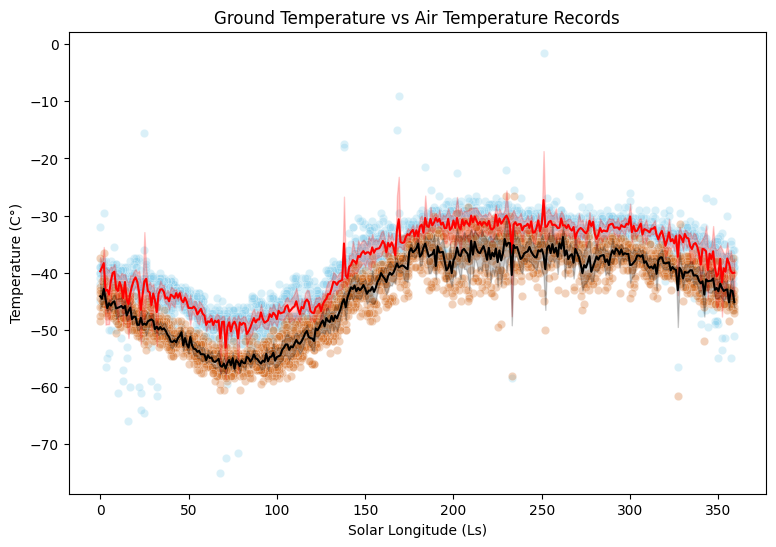

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(9, 6))
# Convert temperature columns to numeric type
mars_season['max_ground_temp'] = pd.to_numeric(mars_season['max_ground_temp'], errors='coerce')
mars_season['min_ground_temp'] = pd.to_numeric(mars_season['min_ground_temp'], errors='coerce')

# Calculate the average ground temperature
mars_season['mean_ground_temp'] = (mars_season['max_ground_temp'] + mars_season['min_ground_temp']) / 2

# Drop rows with missing values
mars_season_filtered = mars_season.dropna(subset=['max_ground_temp', 'min_ground_temp', 'avg_ground_temp'])

# Convert air columns to numeric type
mars_season['max_air_temp'] = pd.to_numeric(mars_season['max_air_temp'], errors='coerce')
mars_season['min_air_temp'] = pd.to_numeric(mars_season['min_air_temp'], errors='coerce')

# Calculate the average ground temperature
mars_season['mean_air_temp'] = (mars_season['max_air_temp'] + mars_season['min_air_temp']) / 2

# Drop rows with missing values
mars_season_filtered = mars_season.dropna(subset=['max_ground_temp', 'min_ground_temp', 'avg_ground_temp'])

# Scatter plot of mean air temperature and mean ground temperature
sns.scatterplot(data=mars_season_filtered, x='solar_long', y='mean_air_temp',  color="skyblue",alpha=0.3)
sns.scatterplot(data=mars_season_filtered, x='solar_long', y='mean_ground_temp', color="chocolate", alpha=0.3)

# Plot the trend line for mean air temperature
sns.lineplot(data=mars_season_filtered, x='solar_long',color="red", y='mean_air_temp')

# Plot the trend line for mean ground temperature
sns.lineplot(data=mars_season.dropna(), x='solar_long', color="black", y='mean_ground_temp')

# Set plot title and labels
plt.title('Ground Temperature vs Air Temperature Records')
plt.xlabel('Solar Longitude (Ls)')
plt.ylabel('Temperature (C°)')

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have loaded the Mars season dataset into a DataFrame called 'mars_season'
# And you have preprocessed the data and created 'mean_ground_temp' and 'mean_air_temp' columns as the target variables

# Drop rows with missing values
mars_season_filtered = mars_season.dropna(subset=['mean_ground_temp', 'mean_air_temp'])

# Calculate MSE
mse = mean_squared_error(mars_season_filtered['mean_ground_temp'], mars_season_filtered['mean_air_temp'])
print('Mean Squared Error (MSE):', mse)

# Calculate MAE
mae = mean_absolute_error(mars_season_filtered['mean_ground_temp'], mars_season_filtered['mean_air_temp'])
print('Mean Absolute Error (MAE):', mae)


Mean Squared Error (MSE): 43.1763839811543
Mean Absolute Error (MAE): 5.835296427169219


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Select the feature columns
X = mars_season[['max_ground_temp', 'max_air_temp']]

# Select the target variable
y = mars_season['season']

# Drop rows with missing values
mars_season_filtered = mars_season.dropna(subset=['max_ground_temp', 'max_air_temp'])
X_filtered = mars_season_filtered[['max_ground_temp', 'max_air_temp']]
y_filtered = mars_season_filtered['season']

# Split the filtered dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Create a K-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5705882352941176
